### Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

# Control Flow:
* Data Analysis
* Feature Engineering
* Feature Selection & Dimensions Reduction
* ML/Dl Model Building 

# Data Analysis
* Exploring the dataset

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
dataset = pd.read_csv("train.csv")

# displaying the shape of the dataset
print("Shape of the Dataset : {}".format(dataset.shape))
print("Number of Columns in the Dataset : {}".format(dataset.shape[1]))
print("Number of Rows in the Dataset : {}".format(dataset.shape[0]))

# Understanding the Number of Numeric and Categorical features in dataset
numeric_features = dataset.select_dtypes(include = [np.number])
categoric_features = dataset.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))

# Understanding the dataset
print("Information of the Dataset : {}".format(dataset.info(verbose = False, memory_usage = "deep")))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dataset.describe(include = "all").transpose()

Shape of the Dataset : (1460, 81)
Number of Columns in the Dataset : 81
Number of Rows in the Dataset : 1460
Number of Numerical Features : 38
Number of Categorical Features : 43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 3.9 MB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# looking at the dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


AxesSubplot(0.125,0.125;0.775x0.755)


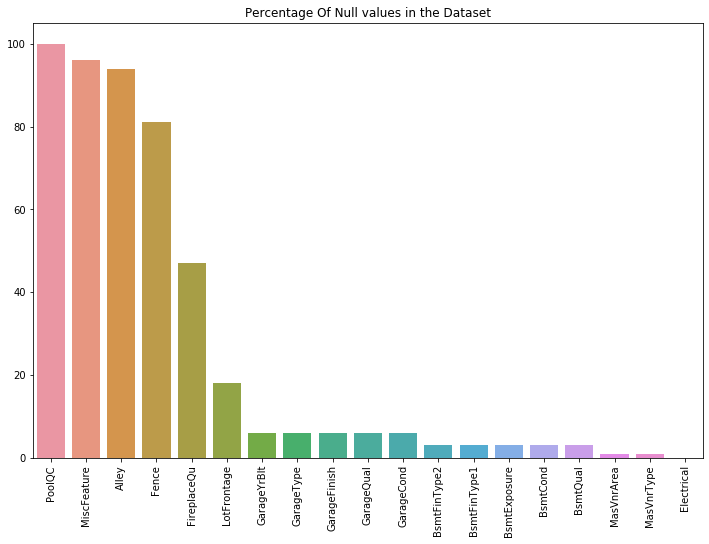

In [4]:
# My function to check the percentage of missing values
def null_check(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    try:
        # dropping null_per which is equal to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        
        # Making the bar plot of the Null values
        plt.figure(figsize = (12,8))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.title("Percentage Of Null values in the Dataset")
        plt.xticks(rotation = "90")
        print(null_plot)
        
    except:
        print("There is NO null values in the dataset")
        print("Returning the Dataset...")
        return dataset

null_check(dataset)

In [5]:
# Dropping some High Null Columns
dataset.drop(columns= ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "Id"], axis= 1, inplace = True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


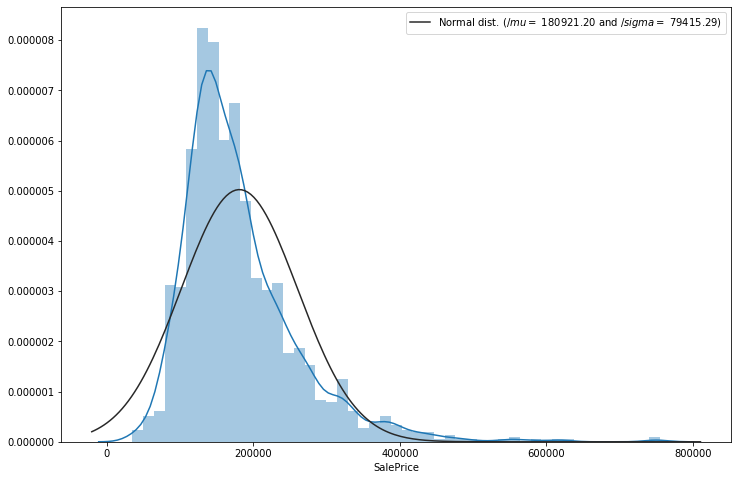

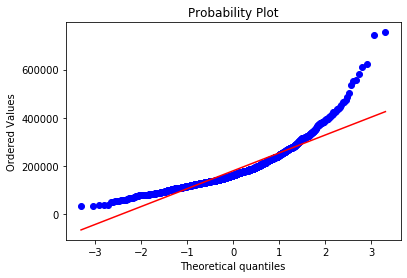

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)), (74160.16474519415, 180921.19589041095, 0.9319665641512986))


In [6]:
# Checking the distribution of the Target
def check_target_distribution(target):
    from scipy import stats
    
    plt.figure(figsize = (12,8))
    plot1 = sns.distplot(target , fit = stats.norm)
    
    # getting the params
    (mu, sigma) = stats.norm.fit(target)
    
    # legenf of the distribution
    plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
    # making the QQ plot / Probability plot 
    fig = plt.figure()
    plot2 = stats.probplot(target, plot = plt)
    plt.show()
    
    print(plot1)
    print(plot2)

check_target_distribution(dataset["SalePrice"])

* Thus, the distribution of the target is not Normal. Therefore, I will change the distribution of the target

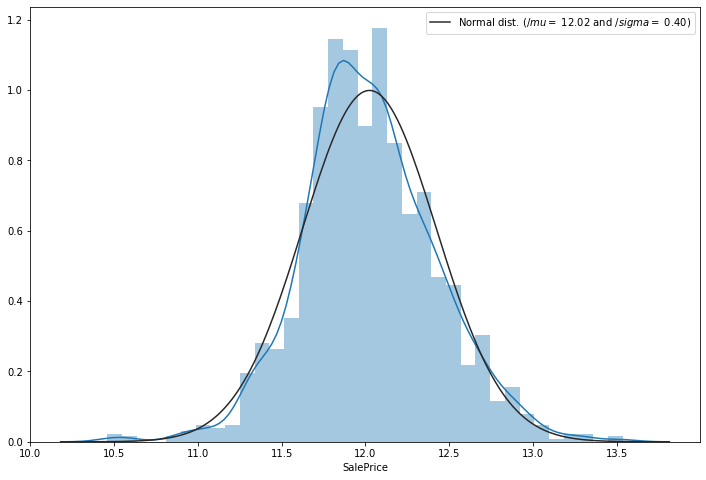

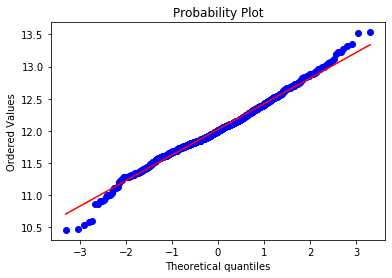

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
       13.5211395 , 13.53447303])), (0.39826223081618867, 12.024050901109383, 0.9953761475636614))


In [7]:
# Checking for Log Distribution
def log_distribution(target):
    from scipy import stats
    target = np.log(target)
    
    plt.figure(figsize = (12,8))
    plot1 = sns.distplot(target , fit = stats.norm)
    
    # getting the params
    (mu, sigma) = stats.norm.fit(target)
    
    # legenf of the distribution
    plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
    # making the QQ plot / Probability plot 
    fig = plt.figure()
    plot2 = stats.probplot(target, plot = plt)
    plt.show()
    
    print(plot1)
    print(plot2)

log_distribution(dataset["SalePrice"])

In [8]:
# Changing the target to log form
dataset["SalePrice"] = np.log(dataset["SalePrice"])
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


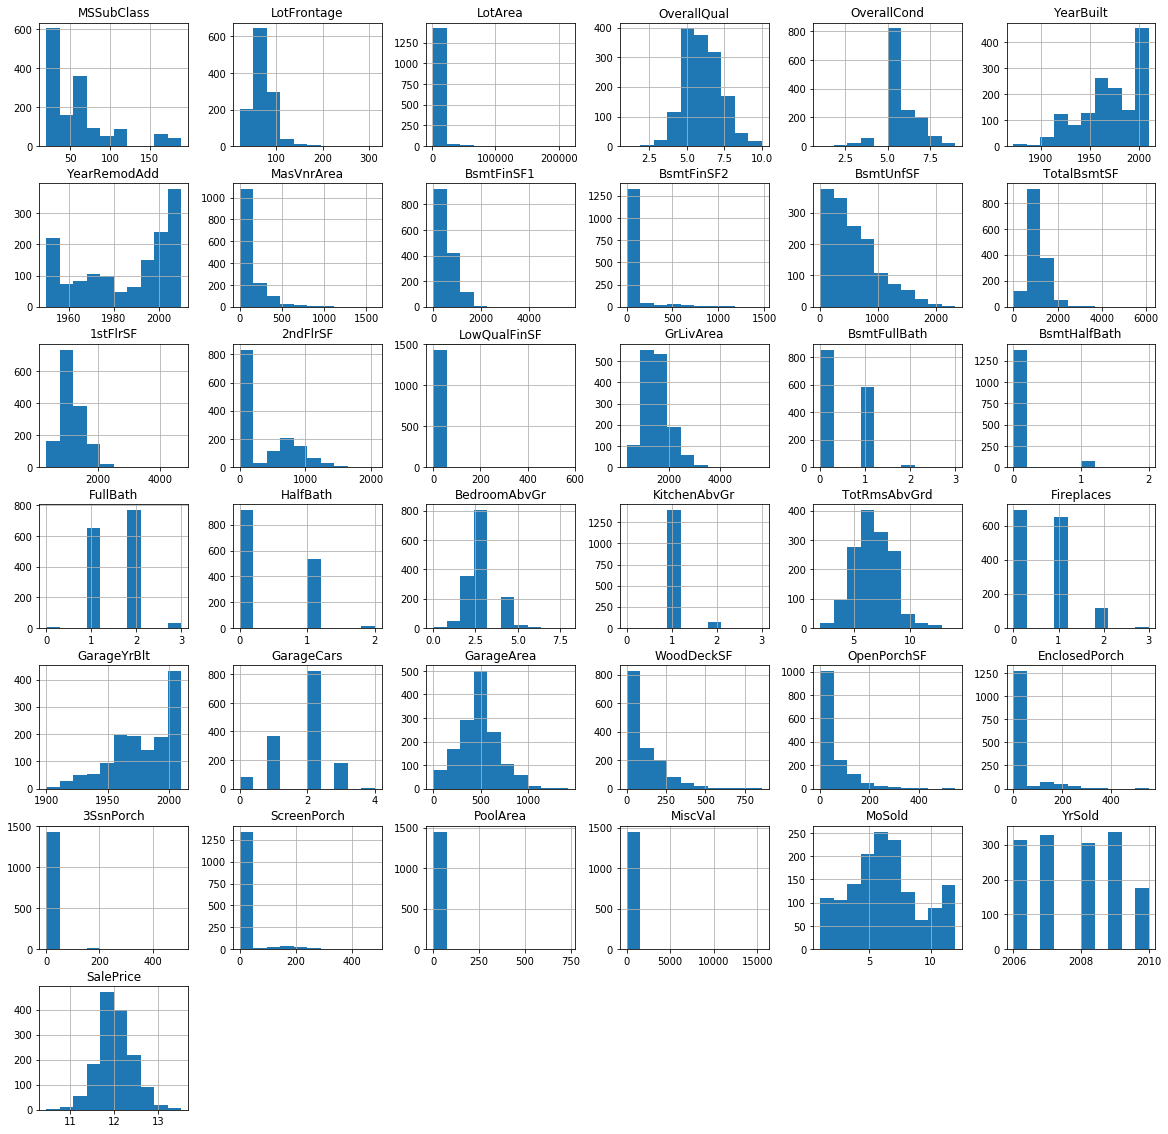

In [9]:
# checking the distribution of the dataset
def check_distribution(dataset):
    c_data = dataset.copy()
    c_data.hist(figsize = (20,20))
    plt.show()
    
check_distribution(dataset)

* Thus, We dom't have normal distribution of the dataset except SalePrice{which I converted in log form}
* For applying linear Ml model, it is important to have normal distribution of the dataset 

# Feature Engineering
* Missing values
* Encoding Categorical Features
* Outliers Removsl : {Controversial, need Domain knowledge}
* Variable Transforming
* Feature Scaling

In [10]:
# Computing the Missing values
def compute_missing_values(dataset):
    
    # Since the data is long, I will drop the missing values
    filtered_dataset = dataset.copy()
    filtered_dataset = filtered_dataset.dropna(axis = 0)
    
    print("Spae of the Inputted dataset : {}".format(dataset.shape))
    print("Shape of the filtered dataset : {}".format(filtered_dataset.shape))
    
    return filtered_dataset

dataset = compute_missing_values(dataset)        
dataset.head()

Spae of the Inputted dataset : (1460, 75)
Shape of the filtered dataset : (1094, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [11]:
# Cardinality of the dataset
def check_cardinality(dataset):
    categorical_features = dataset.select_dtypes(exclude = [np.number])
    
    for col in categorical_features:
        cardinality = len(pd.Index(categorical_features[col]).value_counts())
        print(categorical_features[col].name + " : " + str(cardinality))

check_cardinality(dataset)

#pip install feature-engine

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 6
BldgType : 5
HouseStyle : 8
RoofStyle : 5
RoofMatl : 7
Exterior1st : 14
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 4
Foundation : 5
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 6
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [12]:
#********************************ERROR**********************************************#
def encoding(dataset):
    """
    x -> independent features {categorical_variable}
    y -> dependent features
    """
    x = dataset.iloc[:,:-1]
    y = dataset.iloc[:,-1]
    
    # extracting the numerical columns from the x
    numerical_columns = x.select_dtypes(include = [np.number])
    
    # encoding the categorical features
    from sklearn.preprocessing import LabelEncoder
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    x = x.apply(lambda x: d[x.name].fit_transform(x))
    
    # joining numerical_columns_df and categorical_df
    df = numerical_columns.join(x)
    
    return df

#**********************************************************************************#

def encode_(dataset):
    
    variables = dataset.select_dtypes(exclude = [np.number])
    variables = list(variables)
    
    from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
    encoder = OrdinalCategoricalEncoder(encoding_method= "arbitrary",
                                       variables = variables)
    encoder.fit(dataset)

    dataset = encoder.transform(dataset)
    return dataset

dataset = encode_(dataset)
#dataset.head()

In [13]:
# looking at the dataset
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,12.247694
1,20,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,12.109011
2,60,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,12.317167
3,70,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,2006,0,1,11.849398
4,60,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,0,12,2008,0,0,12.429216


* Thus, this data looks good, all the categorical features are converted into numbers.
* this encoded dataset is good for Trees Ml algorithsm not for linear Ml algorithms

In [14]:
# Info about the dataset
print("Info of the dataset : {}".format(dataset.info(verbose = False, 
                                                     memory_usage = "deep")))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 75 entries, MSSubClass to SalePrice
dtypes: float64(4), int64(71)
memory usage: 649.6 KB
Info of the dataset : None


* Thus, they are all in integer and float types

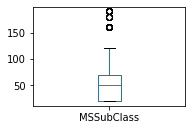

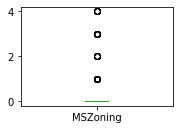

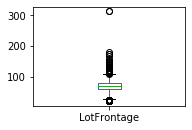

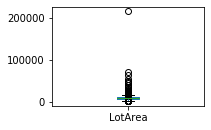

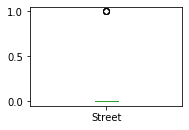

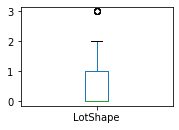

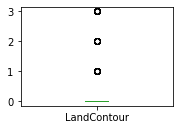

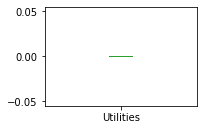

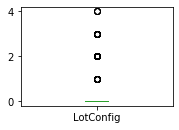

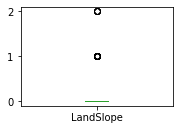

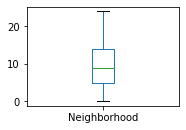

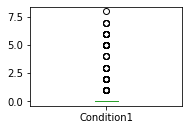

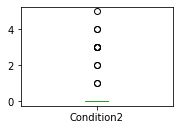

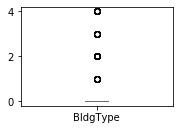

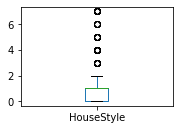

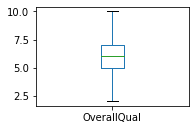

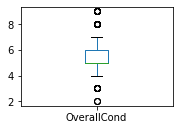

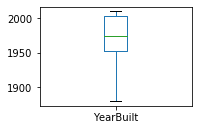

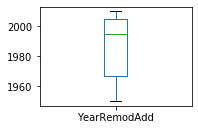

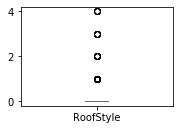

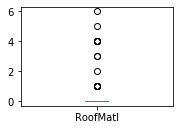

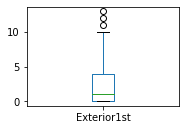

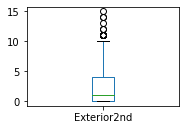

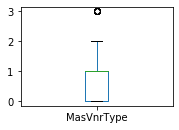

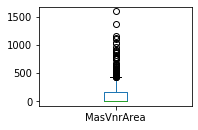

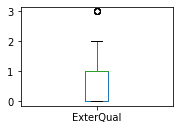

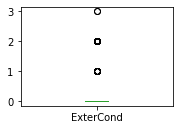

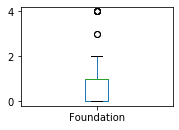

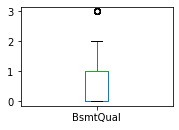

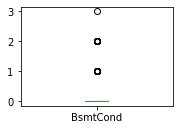

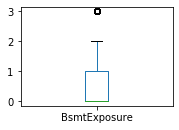

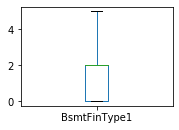

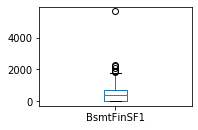

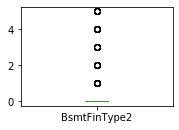

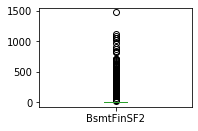

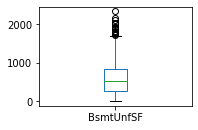

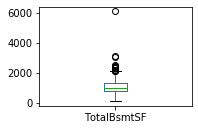

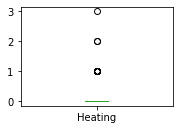

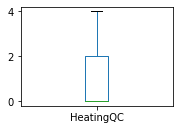

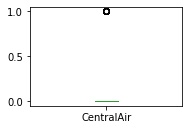

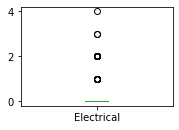

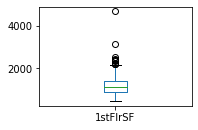

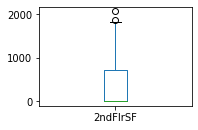

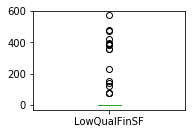

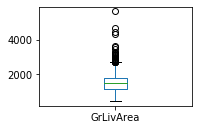

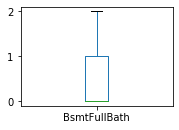

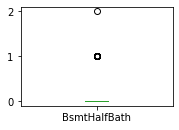

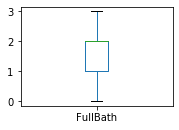

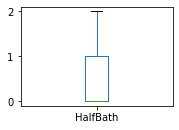

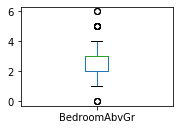

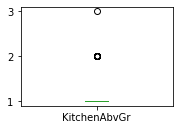

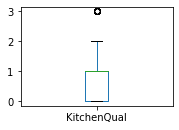

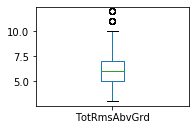

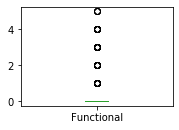

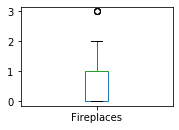

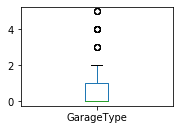

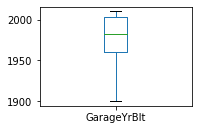

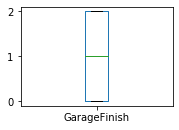

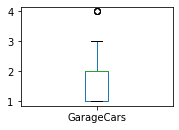

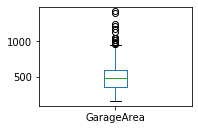

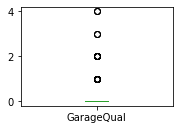

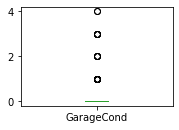

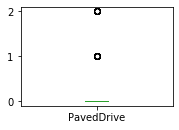

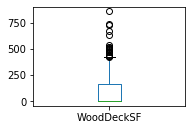

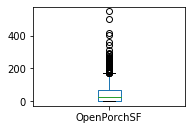

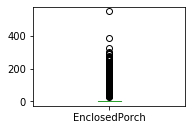

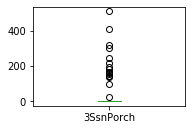

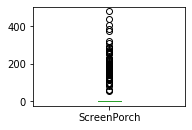

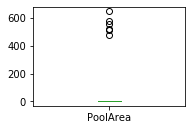

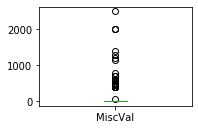

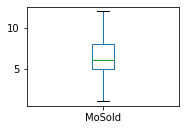

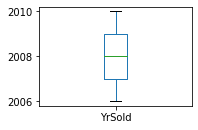

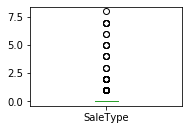

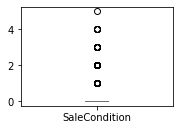

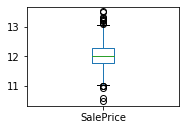

In [15]:
# Outliers Understanding : Box plots
def plot_box_plot(dataset):
    for i in dataset.columns:
        plt.figure()
        plt.subplot(2, 2, 2)
        dataset[i].plot(kind = "box") 
        plt.show()
    
plot_box_plot(dataset)

* Thus, there are many outliers

In [16]:
# My function to remove Outlierms
#**************************************************#
def remove_outliers(dataset):
    for i in dataset.describe().columns:
        q1 = dataset.describe().at["25%" , i]
        q3 = dataset.describe().at["75%" , i]
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)
        
        x = np.array(dataset[i])
        p = []
        
        for j in x:
            if j < lower_bound or j > upper_bound:
                p.append(dataset[i].median())
            else:
                p.append(j)
                
        dataset[i] = p
        
    return dataset

# Removing outliers
#dataset = remove_outliers(dataset)
# this function speed is constant and have compexity of O(n) 
#***************************************************#
def outliers():
    return None


In [17]:
# Plotting the box plots after outliers Removal
#plot_box_plot(dataset)

In [18]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,12.247694
1,20,0,80.0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,12.109011
2,60,0,68.0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,12.317167
3,70,0,60.0,9550,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,2006,0,1,11.849398
4,60,0,84.0,14260,0,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,0,12,2008,0,0,12.429216


Distribution of the feature before diagnosis


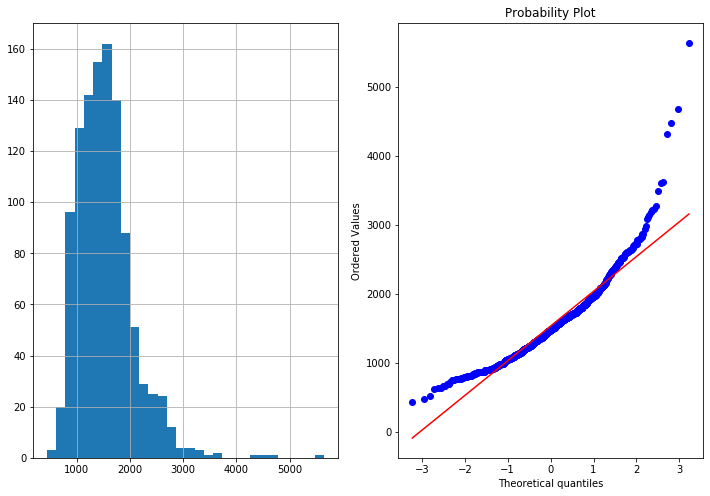

Distribution of the feature before diagnosis


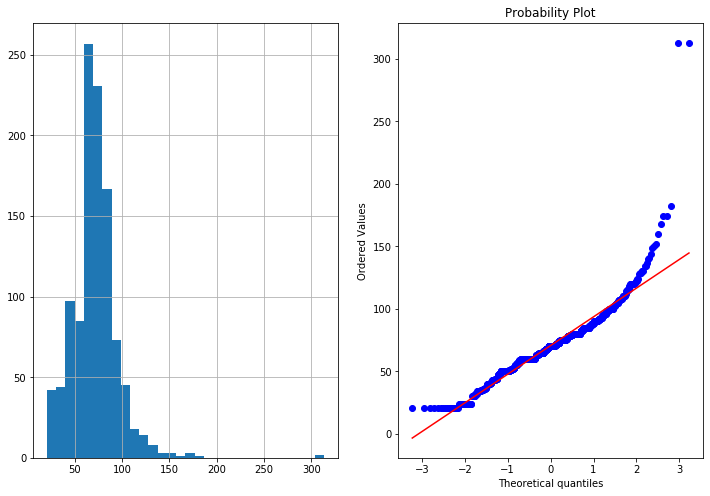

Distribution of the feature before diagnosis


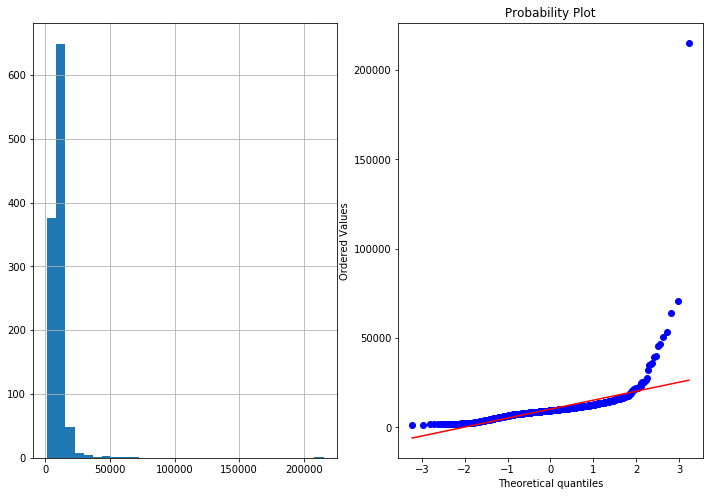

Distribution of the feature before diagnosis


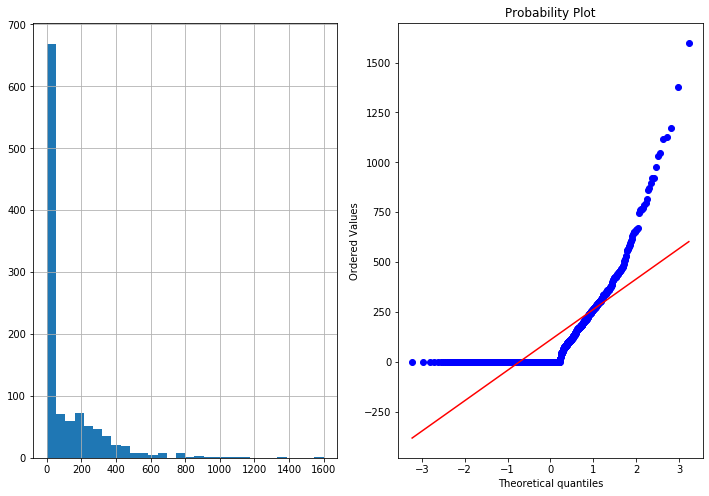

Distribution of the feature before diagnosis


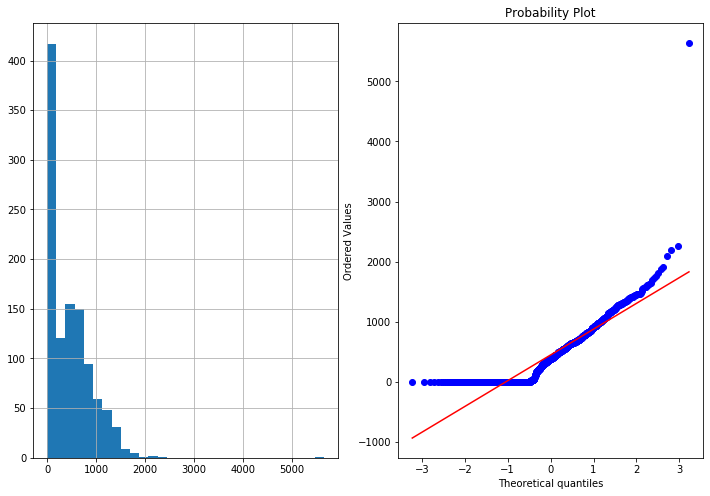

Distribution of the feature before diagnosis


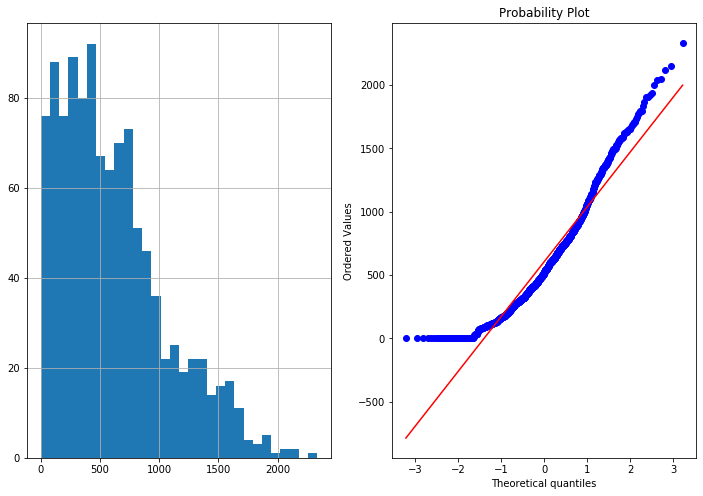

Distribution of the feature before diagnosis


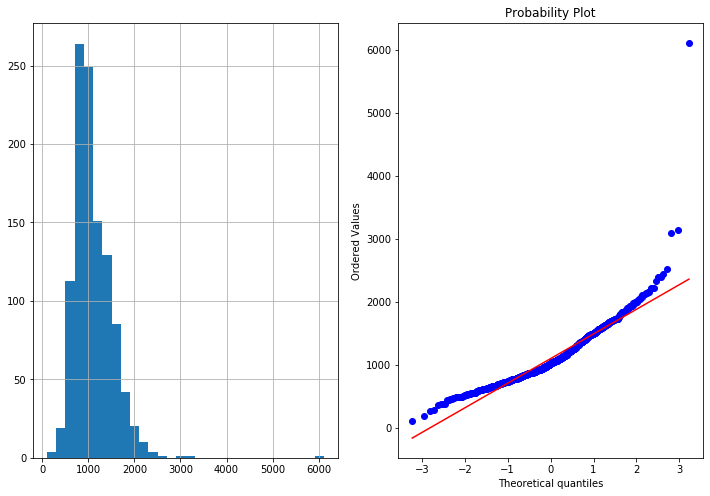

Distribution of the feature before diagnosis


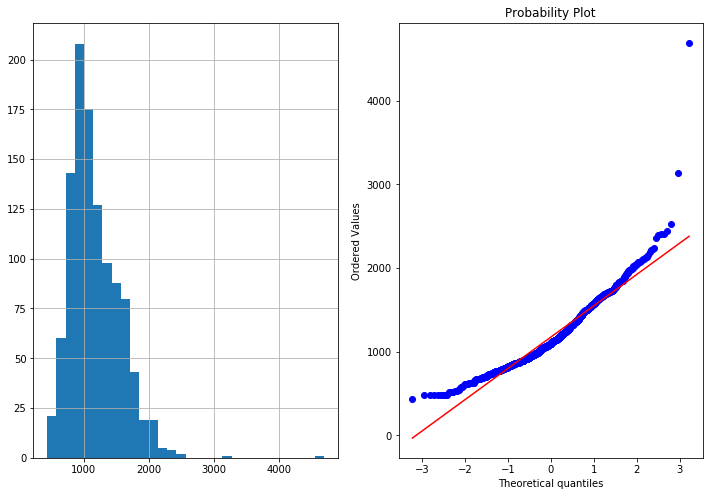

Distribution of the feature before diagnosis


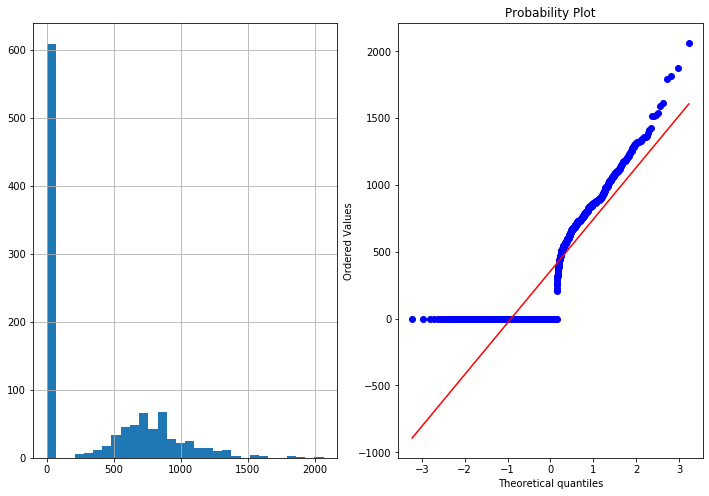

Distribution of the feature before diagnosis


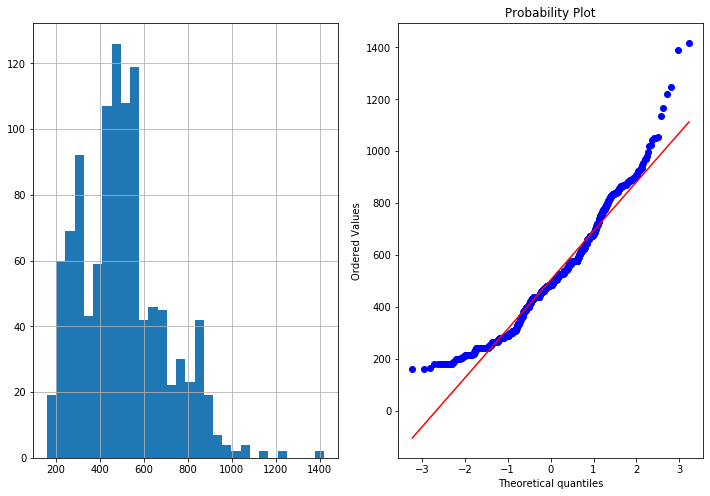

In [19]:
# transforming the variables
def diagnostic_plots(dataset, variable):
    from scipy import stats
    
    print("Distribution of the feature before diagnosis")
    # plotting the histogram
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    dataset[variable].hist(bins = 30)
    
    # plotting the QQ-plot
    plt.subplot(1,2,2)
    stats.probplot(dataset[variable], plot = plt)
    plt.show()
    
diagnostic_plots(dataset, "GrLivArea")
#diagnostic_plots(dataset, "MSSubClass")
diagnostic_plots(dataset, "LotFrontage")
diagnostic_plots(dataset, "LotArea")
diagnostic_plots(dataset, "MasVnrArea")
diagnostic_plots(dataset, "BsmtFinSF1")
diagnostic_plots(dataset, "BsmtUnfSF")
diagnostic_plots(dataset, "TotalBsmtSF")
diagnostic_plots(dataset, "1stFlrSF")
diagnostic_plots(dataset, "2ndFlrSF")
diagnostic_plots(dataset, "GarageArea")


In [20]:
# Removing outliers


In [21]:
# Variable transformation
dataset["GrLivArea"] = np.log(dataset["GrLivArea"])
dataset["LotFrontage"] = np.log(dataset["LotFrontage"])
dataset["LotArea"] = np.log(dataset["LotArea"])
#dataset["MasVnrArea"] = np.log(dataset["MasVnrArea"])
dataset["BsmtFinSF1"] = np.log(dataset["BsmtFinSF1"])
dataset["BsmtUnfSF"] = np.log(dataset["BsmtUnfSF"])
dataset["TotalBsmtSF"]  = np.log(dataset["TotalBsmtSF"])
dataset["1stFlrSF"] = np.log(dataset["1stFlrSF"])
dataset["2ndFlrSF"] = np.log(dataset["2ndFlrSF"])
dataset["GarageArea"] = np.log(dataset["GarageArea"])


Distribution of the feature before diagnosis


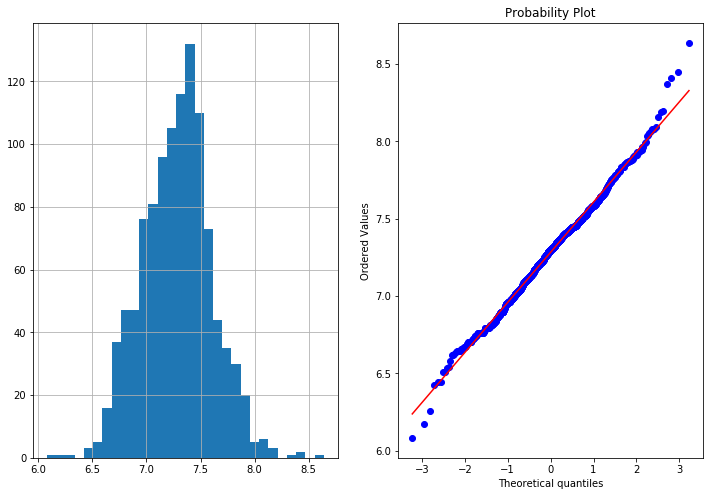

Distribution of the feature before diagnosis


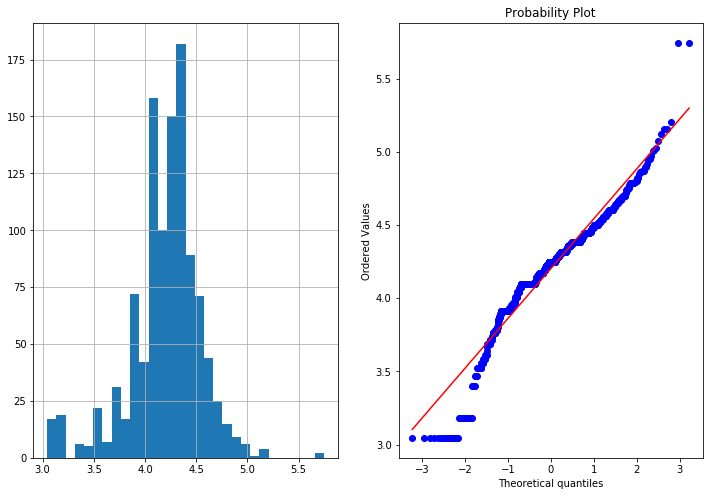

Distribution of the feature before diagnosis


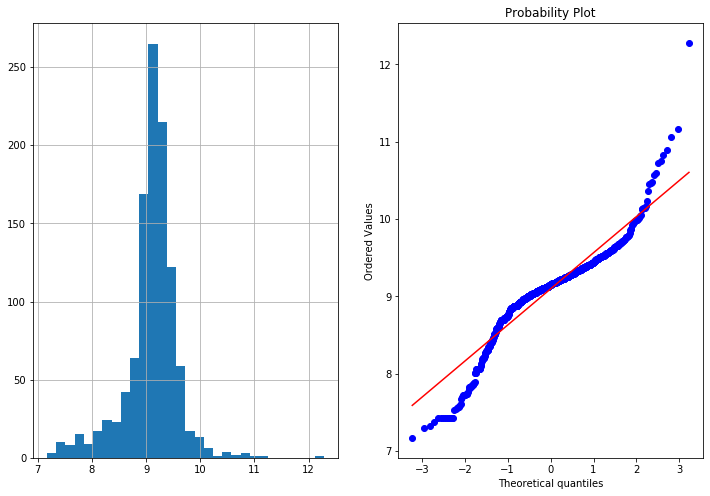

Distribution of the feature before diagnosis


ValueError: supplied range of [-inf, 8.638348312972704] is not finite

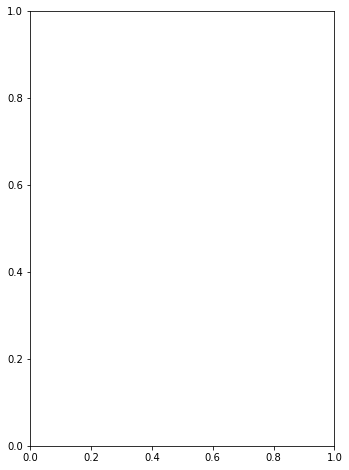

In [22]:
## Checking the distribution after the variable transformation
diagnostic_plots(dataset, "GrLivArea")
diagnostic_plots(dataset, "LotFrontage")
diagnostic_plots(dataset, "LotArea")
#diagnostic_plots(dataset, "MasVnrArea")
diagnostic_plots(dataset, "BsmtFinSF1")
diagnostic_plots(dataset, "BsmtUnfSF")
diagnostic_plots(dataset, "TotalBsmtSF")
diagnostic_plots(dataset, "1stFlrSF")
diagnostic_plots(dataset, "2ndFlrSF")
diagnostic_plots(dataset, "GarageArea")